### Download dataset

In [1]:
!mkdir dataset
!wget https://raw.githubusercontent.com/GiuseppeMoscarelli/Thoracic-Surgery/main/dataset/CleanThoracicSurgery.csv -P dataset -nc

--2021-11-30 16:01:04--  https://raw.githubusercontent.com/GiuseppeMoscarelli/Thoracic-Surgery/main/dataset/CleanThoracicSurgery.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22704 (22K) [text/plain]
Saving to: ‘dataset/CleanThoracicSurgery.csv’

CleanThoracicSurger 100%[===================>]  22.17K  --.-KB/s    in 0.002s  

2021-11-30 16:01:05 (14.1 MB/s) - ‘dataset/CleanThoracicSurgery.csv’ saved [22704/22704]



### Imports

In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC 
from imblearn.over_sampling import RandomOverSampler 

###Read datasets

In [3]:
binary_categories = ['Pain', 'Haemoptysis', 'Dyspnoea', 'Cough',
'Weakness', 'Diabetes_Mellitus', 'MI_6mo', 'PAD',
'Smoking', 'Asthma', 'Death_1yr']

In [4]:
DATASET_PATH = Path('.') / 'dataset' / 'CleanThoracicSurgery.csv'

def load_dataset():
    df = pd.read_csv(DATASET_PATH)
    return df

### Dataset balance analysis

Positive samples: 69
Negative samples: 386



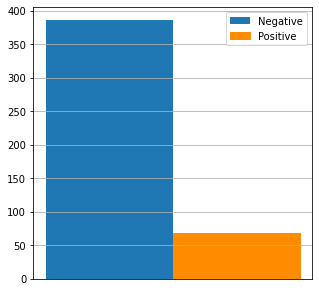

In [5]:
df = load_dataset()

x_labels = list(df.keys()[0:-1])
y_label = df.keys()[-1]

df_positive = df[df[y_label] == True]
df_negative = df[df[y_label] == False]

print(f"Positive samples: {len(df_positive.index)}")
print(f"Negative samples: {len(df_negative.index)}")


hist = df[y_label].hist(figsize=(5,5), bins=2, label=("a", "b"))
hist.patches[1].set_color("darkorange")
hist.axes.get_xaxis().set_visible(False)

hist.legend([hist.patches[0], hist.patches[1]], ["Negative", "Positive"])
print()

In [6]:
#Normalization of continuous attributes
for col in ["FEV1", "FVC", "Age"]:
  df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

In [7]:
# Split train and test set
from sklearn.model_selection import train_test_split

data = df.drop("Death_1yr", inplace=False, axis=1).values
labels = df["Death_1yr"].values

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, stratify=labels, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

train_df = pd.DataFrame(x_train, columns=x_labels)
train_df[y_label] = y_train

test_df = pd.DataFrame(x_test, columns=x_labels)
test_df[y_label] = y_test

(318, 16) (318,)
(137, 16) (137,)


In [8]:
#Sample a patient from the test set (it will be useful to make an example in decision trees)
test_df[-2:-1].head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
135,DGN2,0.337449,0.336283,PRZ1,0,0,0,1,0,OC11,0,0,0,0,0,0.424242,0


###Applying SMOTE

Before SMOTE
Positive samples: 48
Negative samples: 270
After SMOTE
Positive samples: 270
Negative samples: 270



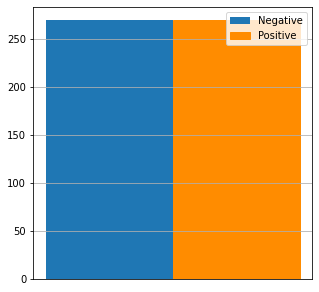

In [9]:

categorical_features = [(df[c].dtype == "object" or c in binary_categories) for c in x_labels]

# print(categorical_features, len(categorical_features))

sm = SMOTENC(random_state=42, categorical_features=categorical_features, sampling_strategy='not majority')
# sm = SMOTENC(random_state=42, categorical_features=categorical_features, sampling_strategy='minority')
print("Before SMOTE")
# print(x_train.shape, y_train.shape)
before_SMOTE_train_df = pd.DataFrame(x_train, columns=x_labels)
before_SMOTE_train_df[y_label] = y_train
before_SMOTE_df_positive = before_SMOTE_train_df[before_SMOTE_train_df[y_label] == True]
before_SMOTE_df_negative = before_SMOTE_train_df[before_SMOTE_train_df[y_label] == False]
print(f"Positive samples: {len(before_SMOTE_df_positive.index)}")
print(f"Negative samples: {len(before_SMOTE_df_negative.index)}")
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)
print("After SMOTE")
# print(x_train_smote.shape, y_train_smote.shape)

train_smote_df = pd.DataFrame(x_train_smote, columns=x_labels)
train_smote_df[y_label] = y_train_smote


df_positive = train_smote_df[train_smote_df[y_label] == True]
df_negative = train_smote_df[train_smote_df[y_label] == False]

print(f"Positive samples: {len(df_positive.index)}")
print(f"Negative samples: {len(df_negative.index)}")


hist = train_smote_df[y_label].hist(figsize=(5,5), bins=2)
hist.patches[1].set_color("darkorange")
hist.axes.get_xaxis().set_visible(False)

hist.legend([hist.patches[0], hist.patches[1]], ["Negative", "Positive"])
print()


Scatter plot the three continuous attributes "FVC", "FEV1" and "Age" before SMOTE application

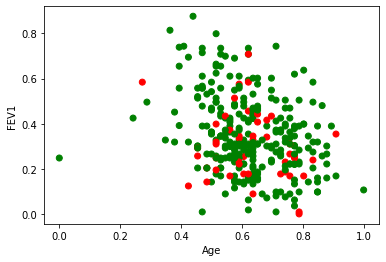

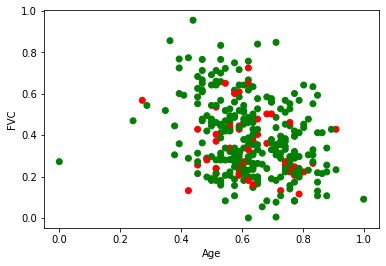

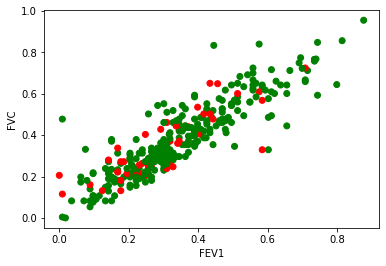

In [10]:
colors = ["red" if label == True else "green" for label in train_df[y_label]]
plt.scatter(train_df.Age, train_df.FEV1, marker='o', c=colors)
plt.xlabel('Age')
plt.ylabel('FEV1')
plt.show()

plt.scatter(train_df.Age, train_df.FVC, marker='o', c=colors)
plt.xlabel('Age')
plt.ylabel('FVC')
plt.show()

plt.scatter(train_df.FEV1, train_df.FVC, marker='o', c=colors)
plt.xlabel('FEV1')
plt.ylabel('FVC')
plt.show()

Scatter plot the three continuous attributes "FVC", "FEV1" and "Age" after SMOTE application

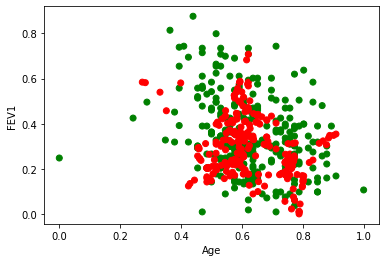

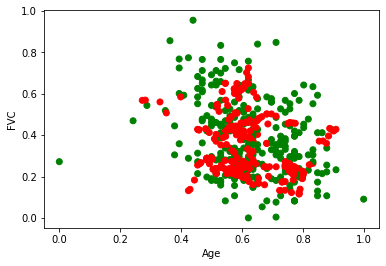

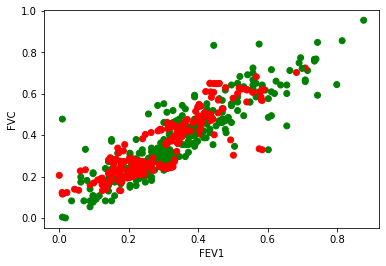

In [11]:
colors = ["red" if label == True else "green" for label in train_smote_df[y_label]]
plt.scatter(train_smote_df.Age, train_smote_df.FEV1, marker='o', c=colors)
plt.xlabel('Age')
plt.ylabel('FEV1')
plt.show()

plt.scatter(train_smote_df.Age, train_smote_df.FVC, marker='o', c=colors)
plt.xlabel('Age')
plt.ylabel('FVC')
plt.show()

plt.scatter(train_smote_df.FEV1, train_smote_df.FVC, marker='o', c=colors)
plt.xlabel('FEV1')
plt.ylabel('FVC')
plt.show()

In [12]:
print(train_smote_df["Death_1yr"].sum())

270


### Applying RandomOverSampler

Before Random Oversampling
Positive samples: 48
Negative samples: 270

After Random Oversampling
Positive samples: 270
Negative samples: 270



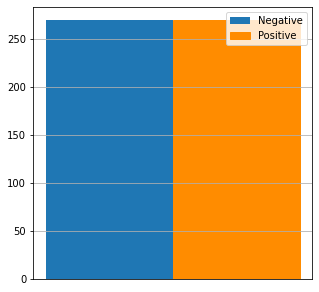

In [13]:
ros = RandomOverSampler(random_state=42)
# sm = SMOTENC(random_state=42, categorical_features=categorical_features, sampling_strategy='minority')
print("Before Random Oversampling")
before_train_df = pd.DataFrame(x_train, columns=x_labels)
before_train_df[y_label] = y_train
before_df_positive = before_train_df[before_train_df[y_label] == True]
before_df_negative = before_train_df[before_train_df[y_label] == False]
print(f"Positive samples: {len(before_df_positive.index)}")
print(f"Negative samples: {len(before_df_negative.index)}")

x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)
print()
print("After Random Oversampling")
# print(x_train_ros.shape, y_train_ros.shape)

train_ros_df = pd.DataFrame(x_train_ros, columns=x_labels)
train_ros_df[y_label] = y_train_ros

df_positive = train_ros_df[train_ros_df[y_label] == True]
df_negative = train_ros_df[train_ros_df[y_label] == False]

print(f"Positive samples: {len(df_positive.index)}")
print(f"Negative samples: {len(df_negative.index)}")


hist = train_ros_df[y_label].hist(figsize=(5,5), bins=2)
hist.patches[1].set_color("darkorange")
hist.axes.get_xaxis().set_visible(False)

hist.legend([hist.patches[0], hist.patches[1]], ["Negative", "Positive"])
print()


Scatter plot the three continuous attributes "FVC", "FEV1" and "Age" after Random Oversampling application

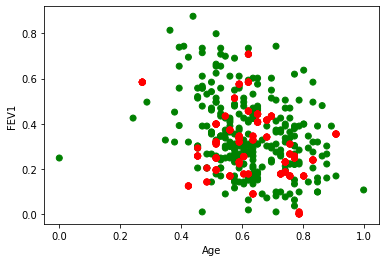

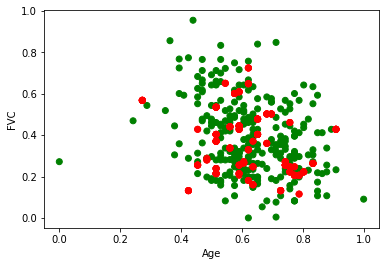

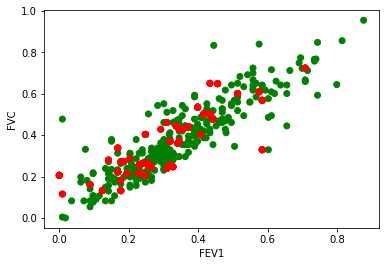

In [14]:
colors = ["red" if label == True else "green" for label in train_ros_df[y_label]]
plt.scatter(train_ros_df.Age, train_ros_df.FEV1, marker='o', c=colors)
plt.xlabel('Age')
plt.ylabel('FEV1')
plt.show()

plt.scatter(train_ros_df.Age, train_ros_df.FVC, marker='o', c=colors)
plt.xlabel('Age')
plt.ylabel('FVC')
plt.show()

plt.scatter(train_ros_df.FEV1, train_ros_df.FVC, marker='o', c=colors)
plt.xlabel('FEV1')
plt.ylabel('FVC')
plt.show()

### Save the new obtained datasets

In [15]:
train_df.to_csv(Path('.') / 'dataset' / 'ThoracicSurgery_train.csv', index=False)
train_smote_df.to_csv(Path('.') / 'dataset' / 'ThoracicSurgery_Smote_train.csv', index=False)
train_ros_df.to_csv(Path('.') / 'dataset' / 'ThoracicSurgery_RandomOverSampler_train.csv', index=False)
test_df.to_csv(Path('.') / 'dataset' / 'ThoracicSurgery_test.csv', index=False)
